This notebook aims to explore and examine the data without making any changes to it

We make many observational notes along the way. 


Tiny note: At the end of the notebook we see that outliers are a characteristic of the data and present in large percentages across features and hence we do not explicitly do treatment

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
base_dir = #insert
data_dir = base_dir + 'Data/'

In [6]:
credit_df = pd.read_csv(data_dir+'train.csv')

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10964 entries, 0 to 10963
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          10964 non-null  int64  
 1   payment_note_date                   1156 non-null   object 
 2   payment_note_amount                 3814 non-null   float64
 3   financials_date                     10964 non-null  object 
 4   financials_date-1                   10709 non-null  object 
 5   financials_date-2                   10186 non-null  object 
 6   financials_date-3                   9613 non-null   object 
 7   financials_date-4                   9007 non-null   object 
 8   revenue                             10964 non-null  int64  
 9   revenue-1                           10709 non-null  float64
 10  revenue-2                           10186 non-null  float64
 11  revenue-3                           9613 

<AxesSubplot:>

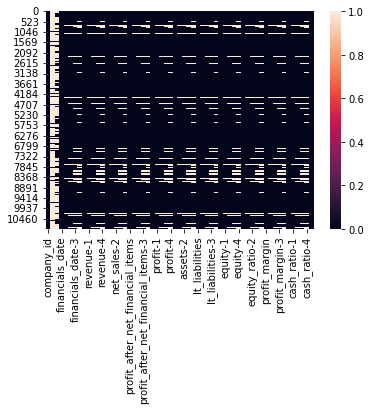

In [9]:
sns.heatmap(credit_df.isnull()) # okay interesting and systematic missing data patterns.

In [11]:
# seems as if each row is for a different company. drop in transform script. 
print(len(set(credit_df.company_id)),credit_df.shape[0])

10964 10964


## Feature investigations

- payment_note_date
- payment_note_amount

In [40]:
# the only time there is a payment_note_amount and there is not a payment_note_date, the amount is zero. Set these to np.nan
sum(credit_df[['payment_note_date','payment_note_amount']].isnull().sum(axis=1)==1)
credit_df['payment_note_amount'].iloc[np.where(credit_df[['payment_note_date','payment_note_amount']].isnull().sum(axis=1)==1)].sum()
rows_to_replace = np.where(credit_df[['payment_note_date','payment_note_amount']].isnull().sum(axis=1)==1)
credit_df.loc[rows_to_replace[0],'payment_note_amount'] = np.nan

In [44]:
credit_df[['payment_note_date','payment_note_amount']].isnull().sum()/credit_df.shape[0]

payment_note_date      0.894564
payment_note_amount    0.894564
dtype: float64

In [45]:
credit_df[~credit_df.payment_note_date.isnull()] #TODO: correlation of features

,company_id,payment_note_date,payment_note_amount,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4,revenue,revenue-1,...,profit_margin-1,profit_margin-2,profit_margin-3,profit_margin-4,cash_ratio,cash_ratio-1,cash_ratio-2,cash_ratio-3,cash_ratio-4,Rating
0,1,2014/06/12,6487.0,Aug-18,Aug-17,Aug-16,Aug-15,Aug-14,5677,8673.0,...,13.6,10.3,16.8,-5.4,395.5,232.4,184.7,236.4,148.1,AAA
4,5,2015/05/03,85539.0,Jul-18,Jul-17,Jul-16,Jul-15,Jul-14,10221,8358.0,...,14.6,-0.4,-0.6,9.7,159.9,183.1,112.5,215.5,134.3,AA
23,24,2018/06/03,241437.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,8136,8721.0,...,13.6,11.0,6.7,8.1,57.9,91.6,43.2,46.8,35.3,B
26,27,2014/03/02,296489.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,17892,14493.0,...,2.8,8.0,2.3,1.9,58.6,61.2,71.8,63.3,62.1,A
44,45,2016/04/28,31000.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,10109,12263.0,...,-18.3,0.2,5.1,16.2,68.4,62.9,111.6,140.6,175.3,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,10905,2018/08/05,13121.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,7332,7107.0,...,-1.0,0.8,1.0,4.3,76.0,99.5,92.6,100.1,96.4,C
10924,10925,2017/10/02,201392.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,6167,5152.0,...,0.1,1.3,-2.2,-5.1,98.2,69.3,73.2,61.8,62.9,C
10928,10929,2016/10/02,75577.0,Dec-17,Dec-16,Dec-15,Dec-14,NaN,7127,5192.0,...,-10.7,-3.7,-6.1,NaN,139.0,149.2,82.7,105.1,NaN,A
10929,10930,2014/07/10,10228.0,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13,31041,19091.0,...,6.5,4.6,-8.3,2.9,151.0,128.2,62.7,73.7,107.3,AAA


convert object columns

In [58]:
obj_cols = credit_df.select_dtypes(include='object').columns
list(obj_cols)

['payment_note_date',
 'financials_date',
 'financials_date-1',
 'financials_date-2',
 'financials_date-3',
 'financials_date-4',
 'Rating']

In [61]:
credit_df.sample(5)[list(obj_cols)[1:-1]]

,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4
5359,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13
1561,Dec-17,Dec-16,Dec-15,Dec-14,Dec-13
2883,Apr-17,Apr-16,Apr-15,Apr-14,Apr-13
8051,Apr-18,Apr-17,Apr-16,Apr-15,NaN
8638,Dec-17,Dec-16,Dec-15,NaN,NaN


<AxesSubplot:>

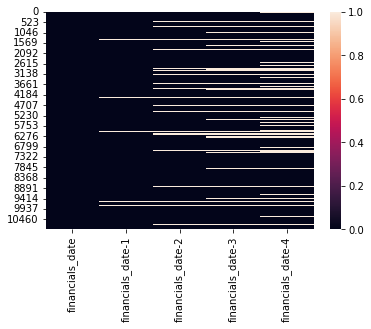

In [62]:
sns.heatmap(credit_df[list(obj_cols)[1:-1]].isnull())

In [ ]:
# for the companies that have years missing, is this consistent for all lagged features? Is this because the company is maybe a new company? 

# we will test for this using the groups of lagged features to see if the same amounts of lagged features are missing for all groups

In [75]:
# can do in list comp
financials_cols = ['financials_date','financials_date-1','financials_date-2','financials_date-3','financials_date-4']
revenue_cols = ['revenue','revenue-1','revenue-2','revenue-3','revenue-4']
net_sales_cols = ['net_sales','net_sales-1','net_sales-2','net_sales-3','net_sales-4']
profit_after_net_financial_items_cols = ['profit_after_net_financial_items','profit_after_net_financial_items-1','profit_after_net_financial_items-2','profit_after_net_financial_items-3','profit_after_net_financial_items-4']
profit_cols = ['profit','profit-1','profit-2','profit-3','profit-4']
assets_cols = ['assets','assets-1','assets-2','assets-3','assets-4']
lt_liabilities_cols = ['lt_liabilities','lt_liabilities-1','lt_liabilities-2','lt_liabilities-3','lt_liabilities-4']
equity_cols = ['equity','equity-1','equity-2','equity-3','equity-4']
equity_ratio_cols = ['equity_ratio','equity_ratio-1','equity_ratio-2','equity_ratio-3','equity_ratio-4']
profit_margin_cols = ['profit_margin','profit_margin-1','profit_margin-2','profit_margin-3','profit_margin-4']
cash_ratio_cols = ['cash_ratio','cash_ratio-1','cash_ratio-2','cash_ratio-3','cash_ratio-4']
col_groups = [financials_cols]+\
             [revenue_cols]+\
             [net_sales_cols]+\
             [profit_after_net_financial_items_cols]+\
             [profit_cols]+\
             [assets_cols]+\
             [lt_liabilities_cols]+\
             [equity_cols]+\
             [equity_ratio_cols]+\
             [profit_margin_cols]+\
             [cash_ratio_cols]

In [338]:
col_groups_dct = {'financials_cols':financials_cols
				 ,'revenue_cols':revenue_cols
                 ,'net_sales_cols':net_sales_cols
                 ,'profit_after_net_financial_items_cols':profit_after_net_financial_items_cols
                 ,'profit_cols':profit_cols
                 ,'assets_cols':assets_cols
                 ,'lt_liabilities_cols':lt_liabilities_cols
                 ,'equity_cols':equity_cols
                 ,'equity_ratio_cols':equity_ratio_cols
                 ,'profit_margin_cols':profit_margin_cols
                 ,'cash_ratio_cols':cash_ratio_cols}

In [340]:
import joblib

save_path = base_dir+'Artifacts/col_groups_dct.joblib'
joblib.dump(col_groups_dct,save_path)

['D:/Projects/Prediction/Techniques Practice/Trees/XGBoost/6. Credit Rating/Artifacts/col_groups_dct']

In [80]:
len_missing_df = pd.DataFrame()
for grp in col_groups:
    len_missing_df[grp[0]]=credit_df[grp].isnull().sum(axis=1)
len_missing_df.sample(5)

,financials_date,revenue,net_sales,profit_after_net_financial_items,profit,assets,lt_liabilities,equity,equity_ratio,profit_margin,cash_ratio
8490,0,0,0,0,0,0,0,0,0,0,0
7420,1,1,1,1,1,1,1,1,1,1,1
4495,2,2,2,2,2,2,2,2,2,2,2
10058,0,0,0,0,0,0,0,0,0,0,0
9928,0,0,0,0,0,0,0,0,0,0,0


In [86]:
len_missing_df.apply(lambda row: row.diff(),axis=1).sum(axis=1).value_counts()

0.0    10964
dtype: int64

In [ ]:
# beautiful. amounts of missing years for lagged feature groups are the same. We can assume that we either don't have information before a certain point or the company is new.
# this would correspond to the years that the financial info (such as the assets, liabities etc) were given
# let's include this as a feature. 

0    9007
1     606
2     573
3     523
4     255
Name: financials_date, dtype: int64

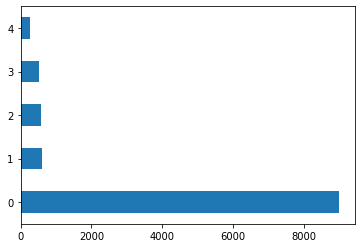

In [98]:

ax = len_missing_df['financials_date'].value_counts().plot(kind='barh',)
len_missing_df['financials_date'].value_counts()

In [ ]:
# in order to find out how to best fill the missing lags, perform a tuning exercise (next notebook) 

In [107]:
# are financials always on the same month?
financials_df = pd.DataFrame()
for col in financials_cols:
    financials_df[col] = credit_df[col].apply(lambda row: str(row)[:3])
#most companies have one month. a few have 2 or 3.
financials_df.apply(lambda row: [x for x in set(row) if x != 'nan'],axis=1).apply(len).value_counts()


1    10433
2      523
3        8
dtype: int64

In [108]:
# create features: 
# - modal month
# - number of different months
# - year of financials_date 
financials_df[financials_df.apply(lambda row: [x for x in set(row) if x != 'nan'],axis=1).apply(len)>1]


,financials_date,financials_date-1,financials_date-2,financials_date-3,financials_date-4
10,Dec,Dec,Dec,Dec,Apr
51,Dec,Apr,Apr,Apr,Apr
53,Dec,Apr,Apr,Dec,Dec
88,Dec,Jun,Jun,Jun,Jun
92,Dec,Jun,Jun,Jun,Jun
...,...,...,...,...,...
10920,Dec,Dec,Apr,Apr,nan
10921,Dec,Apr,Apr,Apr,Apr
10944,Dec,Dec,Apr,Apr,Apr
10950,Aug,Aug,Aug,Aug,Dec


Text(0, 0.5, 'Most recent year')

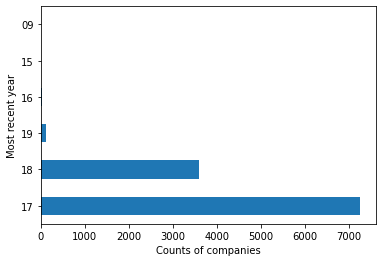

In [116]:
ax = credit_df['financials_date'].apply(lambda row_str: row_str.split('-')[-1]).value_counts().plot(kind='barh')
ax.set_xlabel('Counts of companies')
ax.set_ylabel('Most recent year')

In [187]:
# just make sure to double check that the lag dates are exactly one apart
# they seem to be unordered - even just judging by eye
# create features:
# max year, min year, max gap between years (note : sometimes more than one in a year)
yrs_lst_df = credit_df[financials_cols].apply(lambda row: [str(x).split('-')[-1] for x in row.values if x != 'nan'],axis=1)
yrs_lst_df = yrs_lst_df.apply(lambda row: [int(x) for x in row if x.isdigit()])
yrs_lst_df.apply(lambda row: np.diff(row)).apply(abs).apply(lambda row: sorted(row, reverse=True)).apply(lambda row: row[0] if len(row)>0 else -1).value_counts()


 1    10548
-1      255
 2      145
 3        6
 0        5
 4        4
 5        1
dtype: int64

In [186]:
yrs_lst_df[yrs_lst_df.apply(lambda row: np.diff(row)).apply(abs).apply(lambda row: sorted(row, reverse=True)).apply(lambda row: row[0] if len(row)>0 else row)==0]

2213    [17, 17]
2221    [17, 17]
5907    [17, 17]
7224    [17, 17]
8805    [17, 17]
dtype: object

## Target

In [191]:
credit_df['Rating'].value_counts() # there is an imbalance 

AA     4623
AAA    2784
A      2114
B       888
C       555
Name: Rating, dtype: int64

<AxesSubplot:>

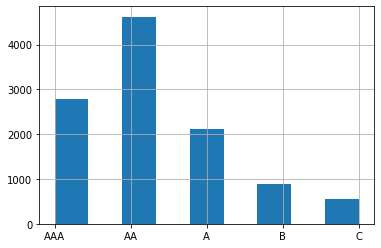

In [196]:
credit_df['Rating'].hist(bins=9)

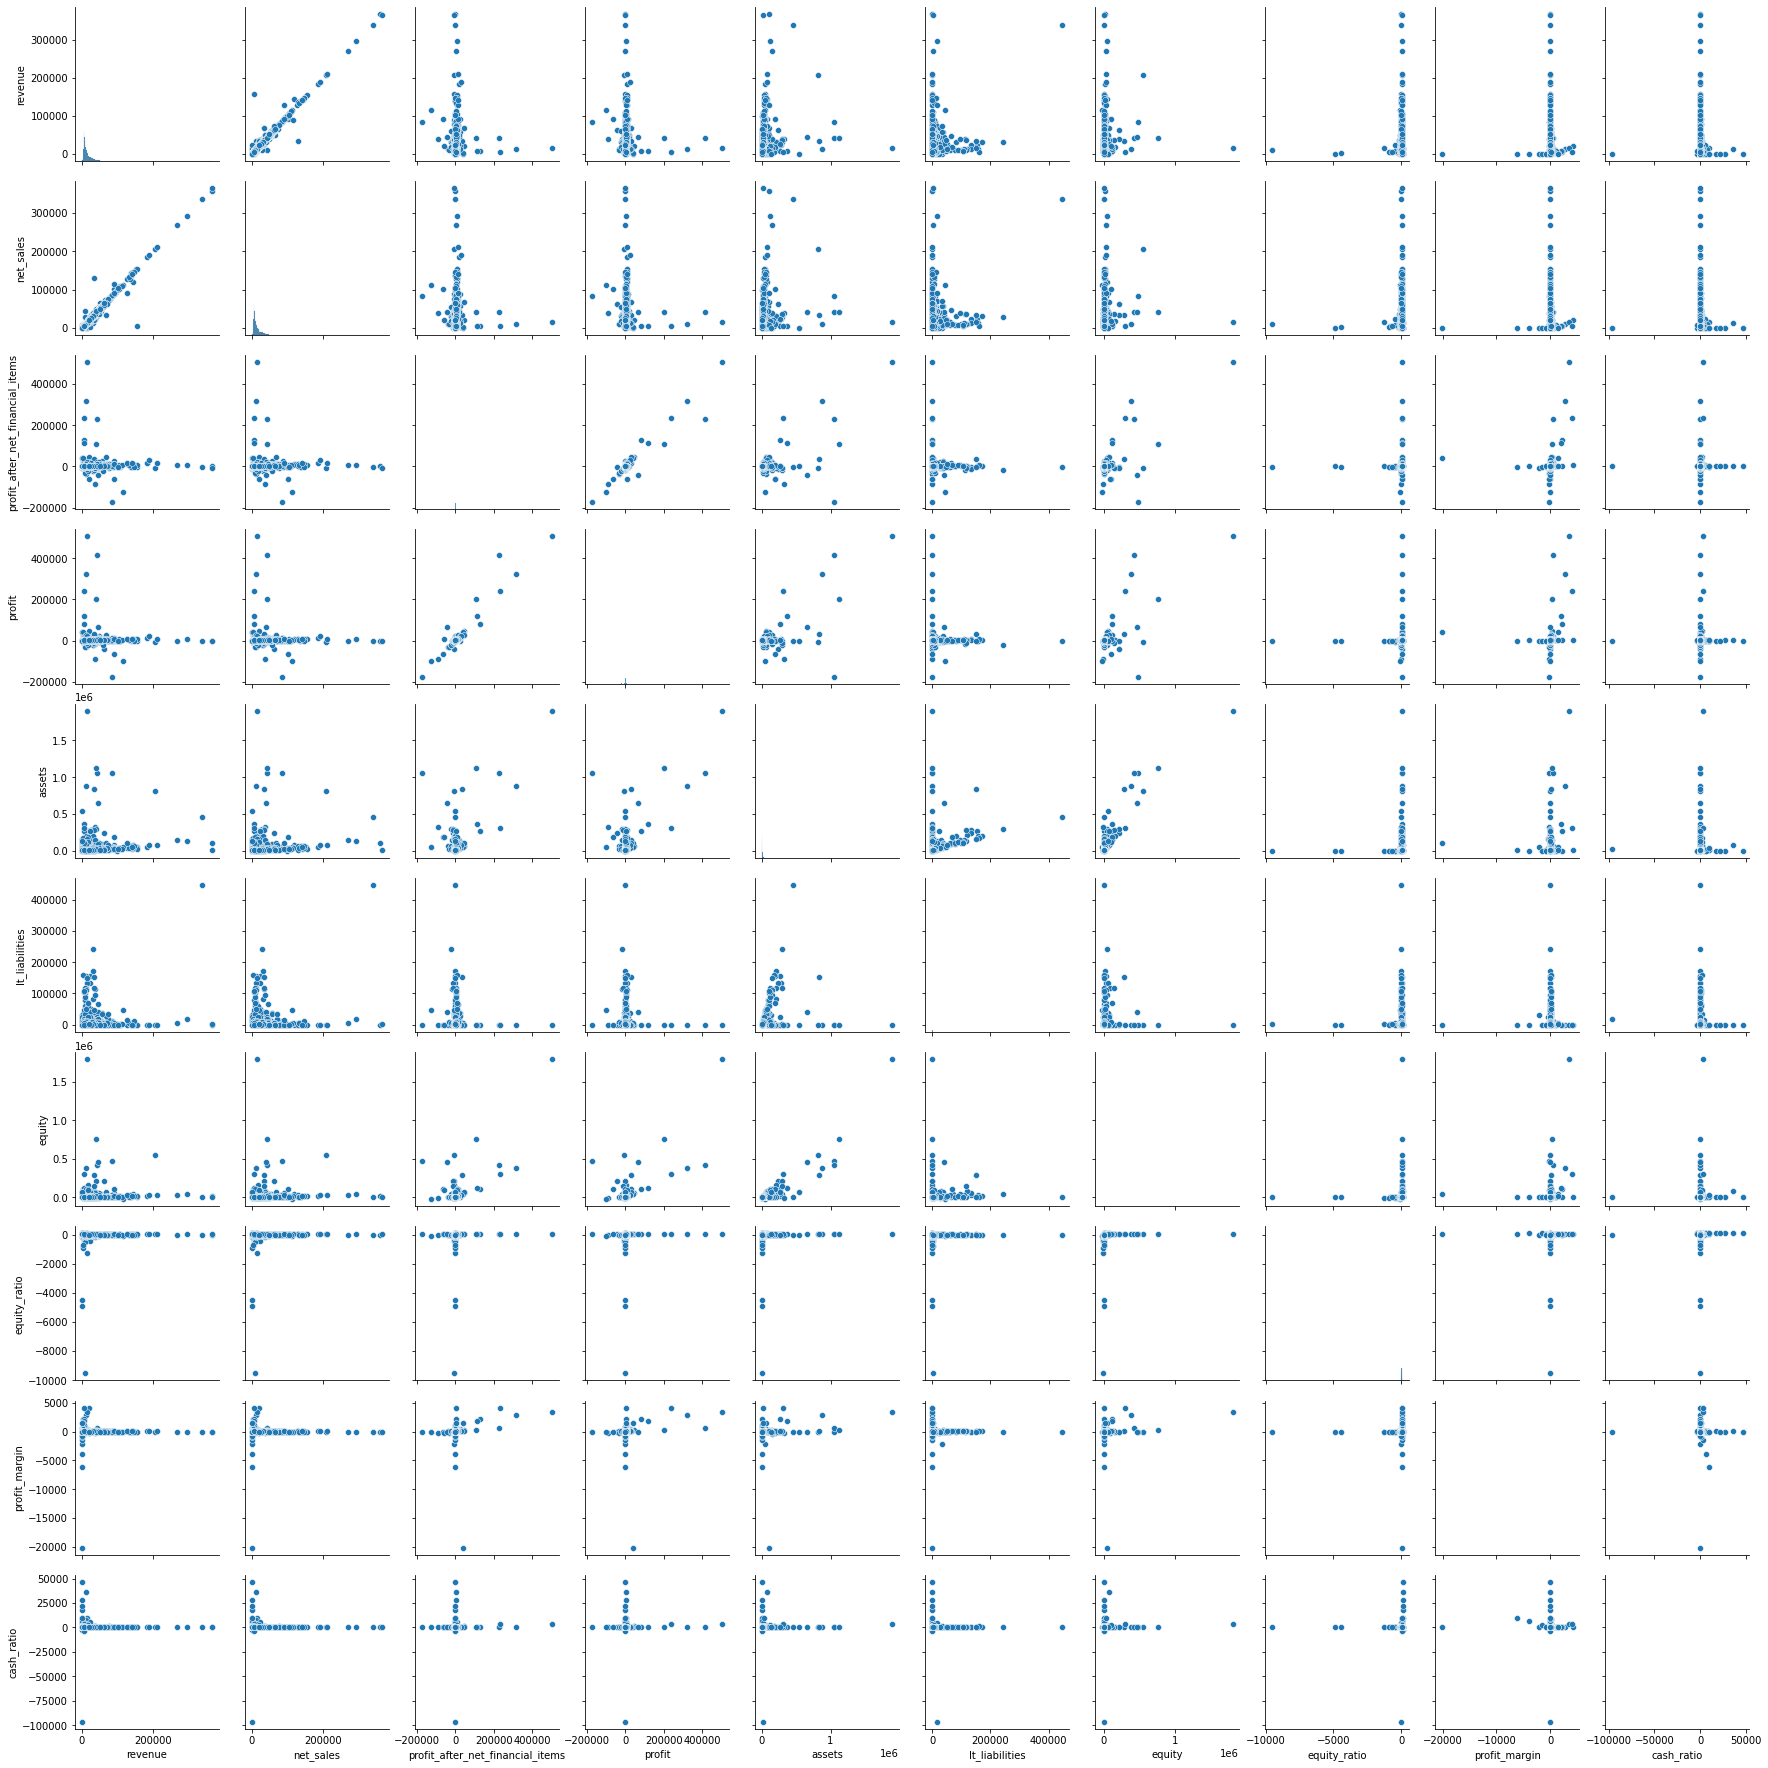

In [209]:
sns.pairplot(credit_df[[col[0] for col in col_groups[1:]]])

In [308]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    print(x_names)
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

In [233]:
%matplotlib inline
cols = ['Rating']+[col[0] for col in col_groups[1:]]
corr = credit_df[cols].corr()

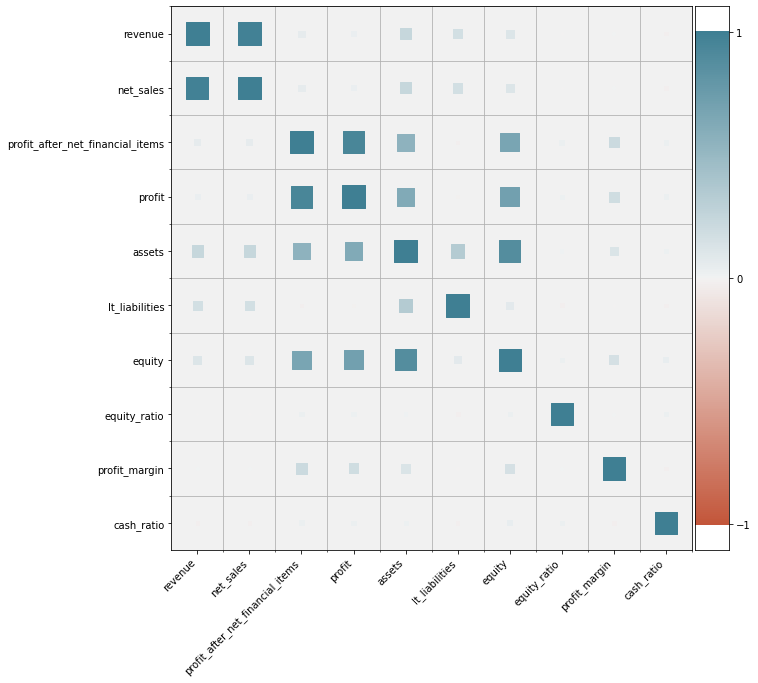

In [234]:
plt.figure(figsize=(10, 10))
corrplot(corr)

In [284]:
np.percentile( data['profit'],90)

1845.1000000000022

C:\Users\nikig\AppData\Local\Temp/ipykernel_34220/754354137.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit_group']=pd.cut(data['profit'], bins=[-100000,0,1500,100000], right=True, labels=bin_labels)
C:\Users\nikig\AppData\Local\Temp/ipykernel_34220/754354137.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cnt'] = np.ones(len(data))


['Negative Profit', 'Profit', 'Right Tail Profit']


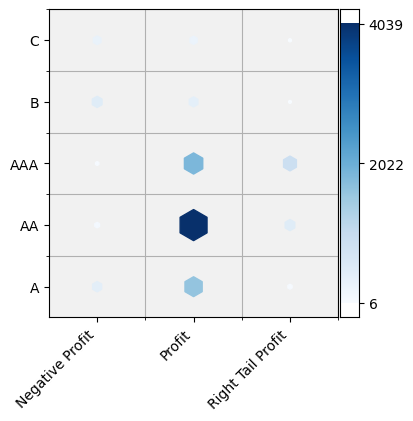

In [313]:
data = credit_df[[col[0] for col in col_groups[1:]]+['Rating']]
#bin_labels = ['(-174466.001, 14.0]', '(14.0, 163.0]', '(163.0, 373.0]', '(373.0, 681.667]', '(681.667, 1269.833]', '(1269.833, 504884.0]']
bin_labels = ['Negative Profit','Profit','Right Tail Profit']
#data['profit_group']=pd.qcut(data['profit'],q = 6,labels=bin_labels)

data['profit_group']=pd.cut(data['profit'], bins=[-100000,0,1500,100000], right=True, labels=bin_labels)

data['cnt'] = np.ones(len(data))

g = data.groupby(['Rating','profit_group']).count()[['cnt']].reset_index().replace(np.nan, 0)
plt.figure(figsize=(4, 4))
heatmap(
    x=g['profit_group'],
    y=g['Rating'],
    size=g['cnt'],
    color=g['cnt'],
    marker='h',
    x_order=bin_labels
) 

<AxesSubplot:xlabel='profit', ylabel='Count'>

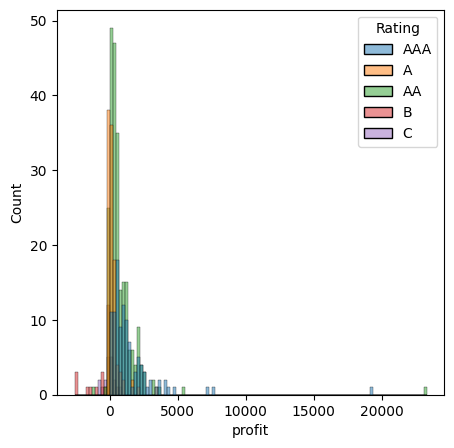

In [317]:
#some super crazy outliers in profit
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
importlib.reload(mpl); importlib.reload(plt); importlib.reload(sns)
plt.figure(figsize=(5, 5))
sns.histplot(data=credit_df.sample(500), x="profit", hue="Rating")

In [343]:
data.describe().T

,revenue,net_sales,profit_after_net_financial_items,profit,assets,lt_liabilities,equity,equity_ratio,profit_margin,cash_ratio,cnt
count,10964.000000,10964.000000,10964.000000,10964.000000,1.096400e+04,10963.00000,1.096400e+04,10964.000000,10964.000000,10964.000000,10964.0
mean,15453.165451,15233.147574,1079.263590,807.536301,9.058477e+03,1357.54237,3.001260e+03,34.895941,6.538718,192.600228,1.0
std,14959.186238,14801.777783,7516.576414,8202.384270,3.387292e+04,7929.39662,2.227813e+04,116.140070,223.550514,1179.225755,0.0
min,-203.000000,0.000000,-174466.000000,-174466.000000,0.000000e+00,-1100.00000,-2.631800e+04,-9539.000000,-20128.600000,-96500.000000,1.0
25%,7049.500000,6924.750000,112.000000,74.000000,2.614750e+03,0.00000,5.620000e+02,21.800000,1.600000,107.000000,1.0
50%,10853.000000,10705.000000,592.000000,373.000000,4.868500e+03,9.00000,1.256000e+03,37.100000,5.600000,143.850000,1.0
75%,19103.250000,18790.250000,1415.000000,925.000000,9.181250e+03,850.00000,2.610250e+03,53.200000,11.300000,204.200000,1.0
max,368432.000000,365338.000000,505691.000000,504884.000000,1.901465e+06,447478.00000,1.795990e+06,103.400000,4142.000000,46620.000000,1.0


array([[<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'net_sales'}>,
        <AxesSubplot:title={'center':'profit_after_net_financial_items'}>],
       [<AxesSubplot:title={'center':'profit'}>,
        <AxesSubplot:title={'center':'assets'}>,
        <AxesSubplot:title={'center':'lt_liabilities'}>],
       [<AxesSubplot:title={'center':'equity'}>,
        <AxesSubplot:title={'center':'equity_ratio'}>,
        <AxesSubplot:title={'center':'profit_margin'}>],
       [<AxesSubplot:title={'center':'cash_ratio'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

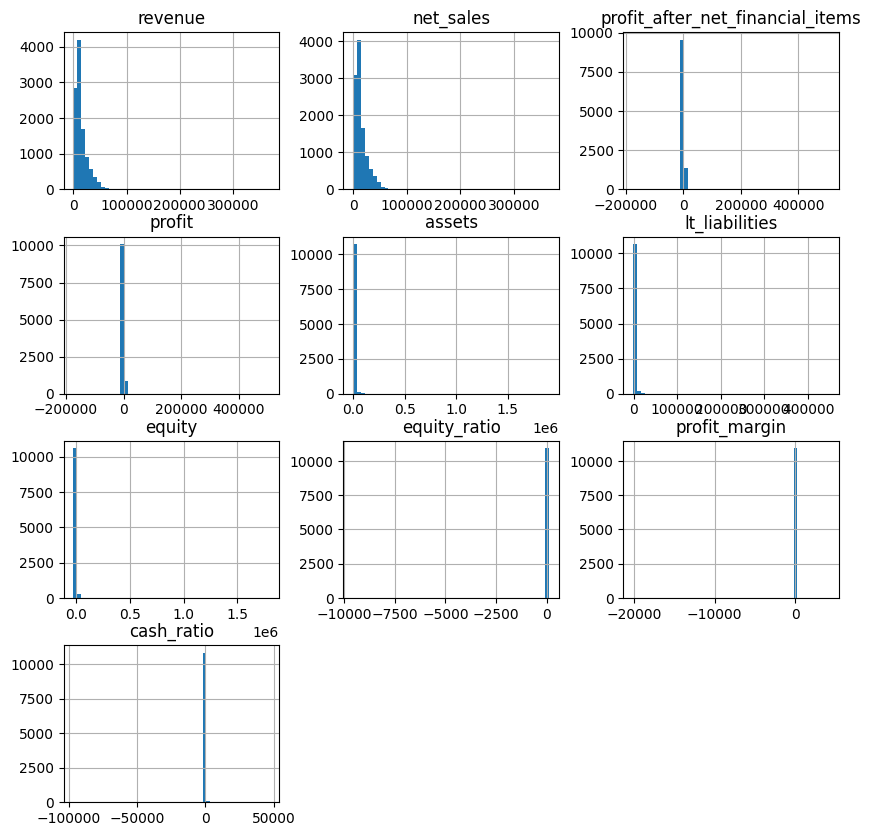

In [334]:
credit_df[cols].hist(bins=50,figsize=(10,10))

In [335]:
# looks like many features have outliers or tails. 
# Will be scaling features for good practice in any case.

In [345]:
data.skew()

C:\Users\nikig\AppData\Local\Temp/ipykernel_34220/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


revenue                              6.950264
net_sales                            6.945675
profit_after_net_financial_items    38.946383
profit                              41.197718
assets                              30.765876
lt_liabilities                      27.003586
equity                              55.854086
equity_ratio                       -63.782275
profit_margin                      -67.228719
cash_ratio                         -39.724390
cnt                                  0.000000
dtype: float64

Index(['revenue', 'net_sales', 'profit_after_net_financial_items', 'profit',
       'assets', 'lt_liabilities', 'equity', 'equity_ratio', 'profit_margin',
       'cash_ratio'],
      dtype='object')

In [355]:
for c in data.columns[:-3]:

    q1 = data[c].quantile(0.25)
    q3 = data[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(data.loc[(data[c] < fence_low)  ,c])
    upper_out = len(data.loc[(data[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(data)
    print(c, ": "+"{:.2%}".format(prop_out))

revenue : 17.39%
net_sales : 17.55%
profit_after_net_financial_items : 21.57%
profit : 20.12%
assets : 14.97%
lt_liabilities : 20.33%
equity : 18.13%
equity_ratio : 16.07%
profit_margin : 20.99%
cash_ratio : 20.80%


In [ ]:
# we will not do outlier treatment as it seems like its part of the bigger picture and contains useful information

In [356]:
financials_cols

['financials_date',
 'financials_date-1',
 'financials_date-2',
 'financials_date-3',
 'financials_date-4']